# Project 9

In the coding project below, answer any bolded questions on Canvas via the assigment named Programming Project 9 Quiz Questions.

Please follow the instructions below (e.g., setting random state values) to ensure that your answers match the solutions.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

You currently work for a company that offers a subscription-based music streaming service. After an unsuccessful round of marketing efforts with low return on investments, your company is exploring other strategies to promote its services. Currently, its advertising strategy has been to bid on a set of keywords that someone on the marketing team put together, but the team has realized that they could improve on this strategy by refining the keywords based on different customer personas. Therefore, the company has asked you to help it identify a set of user segments so that the ads can be more customized. 

For this task, you have been provided with the Music data which contains sociodemographic and music preference data on 4,914 users and your goal is to identify clusters of users based on this information.

| Column | Description |
|:-|:-|
| Age | Age of the user |
| Gender | Gender of the user |
| Employment status | Employment status of the user |
| Annual income | Annual income of the user in USD |
| Usage per month | Average usage per month of the user measured in minutes |
| Top genre | The genre of music that is most streamed by the user |
| Num of days active | The number of days in the last 365 days that the user used the service |



## Getting Set Up
Meet our old friend - PennGrader! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [1]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 20319687                         # 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Carlos Carrillo-Calderon"     # FULL NAME GOES HERE

In [2]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW9', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 20319687

Make sure this correct or we will not be able to store your grade


In [3]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

warnings.simplefilter(action='ignore', category=FutureWarning)

## Part A: Data Cleaning

Throughout this course, you have mostly been provided with relatively clean datasets but in the real world, data is usually a lot messier. This could be caused by data logging errors, bugs in the pipeline or even erroneous human input in surveys. Some common approaches of dealing with these observations are by dropping them, replacing the erroneous values with the mean/median, winsorizing, etc. Here, we will just drop them. 

1. Load the Music data and drop any rows with `NaN/null` values. Assign the dataframe to the variable `music`.

In [4]:
# Load dataset:
music = pd.read_csv('music.csv')

# Drop NaN/null values:
music = music.dropna()

# Display results:
music.head(10)

,age,gender,employment_status,annual_income,usage_per_month,top_genre,num_of_days_active
0,20,Male,Employed full-time,115000,847,Rock,210
1,22,Male,Employed full-time,42100,256,Rock,222
2,18,Male,Employed full-time,114750,1232,Country,161
3,19,Female,Employed full-time,118250,2310,Rock,176
4,33,Male,Employed full-time,111450,568,Pop,185
5,25,Male,Student,15800,73,Rock,215
6,16,Female,Student,11450,248,Pop,92
7,28,Female,Employed full-time,37000,2417,Pop,135
8,23,Male,Employed full-time,94950,2081,Pop,174
9,20,Female,Employed full-time,12050,1820,Classical,123


In [5]:
grader.grade(test_case_id = 'test_read_music', answer = music.shape)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Plot bar charts and histograms of the data to visualize the distributions. Does anything seem unusual? Good to think about: can you encapsulate plotting data into a function?

    - Are there more male or female users? Store your answer in `male_or_female` ('M'/'F').
    - Which genre is the most popular among users? Store your answer in `pop_genre`.
    - How many users are students? Store you answer in `student_num`.

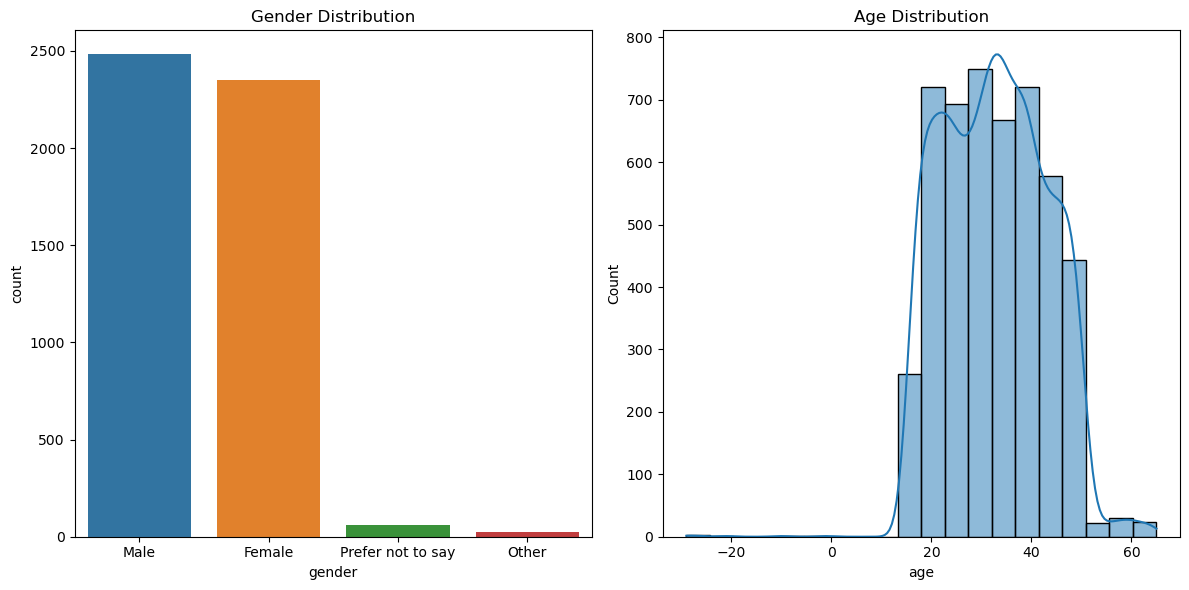

In [6]:
# Function to plot bar charts and histograms:
def plot_data(df):
    plt.figure(figsize=(12, 6))

    # Plot bar chart for categorical data (e.g., gender, genre)
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='gender')
    plt.title('Gender Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(df['age'], bins=20, kde=True)
    plt.title('Age Distribution')

    plt.tight_layout()
    plt.show()

# Call the function to plot data
plot_data(music)

In [7]:
# Determine the more common gender:
gender_counts = music['gender'].value_counts()
male_or_female = 'M' if gender_counts.get('Male', 0) > gender_counts.get('Female', 0) else 'F'
print("More common gender:", male_or_female)

More common gender: M


In [8]:
grader.grade(test_case_id = 'test_visual1', answer = male_or_female)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [9]:
# Find the most popular genre:
pop_genre = music['top_genre'].mode()[0]
print("Most popular genre:", pop_genre)

Most popular genre: Pop


In [10]:
grader.grade(test_case_id = 'test_visual2', answer = pop_genre)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [11]:
student_num = music['employment_status'].str.contains('Student', case=False, na=False).sum()
print("Number of students:", student_num)

Number of students: 1000


In [12]:
grader.grade(test_case_id = 'test_visual3', answer = student_num)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Take a closer look at ‘age’ and ‘num of days active’. Does anything look peculiar? Store the number of invalid 'age' in `bad_age_num`, invalid number of 'num of days active' in `bad_active_num`. Drop these rows and also assign the new dataframe to the variable `music`. *Hint*: Recall the values that age and number of days active can take on.

In [13]:
# PECULIAR VALUES: 
# Assume 'age' should be between 0 and 100:
invalid_age_mask = (music['age'] < 0) | (music['age'] > 100)

# Assume 'num_of_days_active' should be between 0 and 365:
invalid_active_mask = (music['num_of_days_active'] < 0) | (music['num_of_days_active'] > 365)

# Store the count of invalid age values:
bad_age_num = invalid_age_mask.sum()
print("bad_age_num:", bad_age_num)

bad_age_num: 5


In [14]:
grader.grade(test_case_id = 'test_drop1', answer = bad_age_num)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [15]:
# Store the count of invalid active members values:
bad_active_num = invalid_active_mask.sum()
print("bad_active_num:", bad_active_num)

bad_active_num: 2


In [16]:
grader.grade(test_case_id = 'test_drop2', answer = bad_active_num)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [17]:
# Drop rows with invalid entries in-place:
music = music[~(invalid_age_mask | invalid_active_mask)]
music.head(10)

,age,gender,employment_status,annual_income,usage_per_month,top_genre,num_of_days_active
0,20,Male,Employed full-time,115000,847,Rock,210
1,22,Male,Employed full-time,42100,256,Rock,222
2,18,Male,Employed full-time,114750,1232,Country,161
3,19,Female,Employed full-time,118250,2310,Rock,176
4,33,Male,Employed full-time,111450,568,Pop,185
5,25,Male,Student,15800,73,Rock,215
6,16,Female,Student,11450,248,Pop,92
7,28,Female,Employed full-time,37000,2417,Pop,135
8,23,Male,Employed full-time,94950,2081,Pop,174
9,20,Female,Employed full-time,12050,1820,Classical,123


In [18]:
grader.grade(test_case_id = 'test_drop3', answer = music.shape)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B: Clustering

Use K-means clustering to find a set of user groups using the following features as inputs: ‘age’, ‘annual income’, ‘usage per month’ and ‘number of days active’.

1. Standardize the data. *Hint*: `sklearn.preprocessing.scale` may be helpful. 

In [19]:
# Select clustering features:
features = ['age', 'annual_income', 'usage_per_month', 'num_of_days_active']
X = music[features]

# Scale features:
X_scaled = scale(X)

In [20]:
grader.grade(test_case_id = 'test_scale', answer = X_scaled)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Calculate the sum of squared distances of observations to their closest cluster center for $K\in [1,10]$ and add these values to a list called `ssd`. Use the default hyperparameters and set `random_state=42`. Store the minimum value of ssd in `min_ssd`. Comment on your thoughts: shall we choose the model with minimum ssd?

*Hint*: You may want to write a for-loop and refer to the [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) documentation (read through the Attributes section).

In [21]:
# Get optimal number of clusters:
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

min_ssd = min(ssd)

# Print values:
print("\nmin_ssd:", min_ssd)
print("ssd:\n", ssd)


min_ssd: 6005.146621795519
ssd:
 [19628.000000000004, 15279.975937728383, 12077.955741544767, 10201.440641034449, 8891.937330815015, 8046.861745604758, 7350.659679860798, 6768.746844272642, 6328.121959588929, 6005.146621795519]


In [22]:
grader.grade(test_case_id = 'test_min_ssd', answer = min_ssd)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Plot the values in `ssd` against the number of clusters, $K$ for $K\in[1,10]$. 

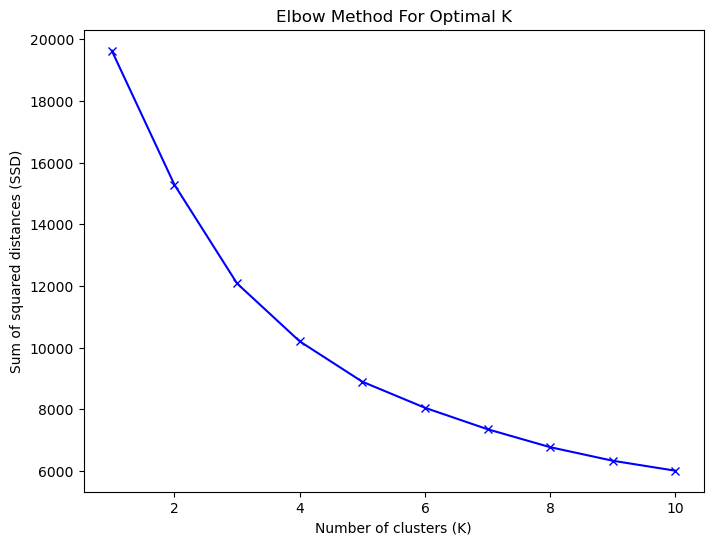

In [23]:
# Values of K
K = range(1, 11)

# Plot SSD values against number of clusters
plt.figure(figsize=(8, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal K')
plt.show()

4. Based on this plot, what is the best number of clusters to set using the Elbow Method? The Elbow Method is the point where diminishing returns are no longer worth the additional cost. It will be the point before which the later points taper off or increase by very little. (More information on the Elbow Method can be found [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In\%20cluster\%20analysis\%2C\%20the\%20elbow,number\%20of\%20clusters\%20to\%20use). Assign this value to the variable `optimal_K` (There might be multiple optimal k values, just enter one of those).

In [24]:
# Per graph above:
optimal_K = 4

In [25]:
grader.grade(test_case_id = 'test_best_K', answer = optimal_K)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Retrain the K-means clustering algorithm with `n_clusters=optimal_K`. This will be your final model. Name your model `best_kmeans` and set `random_state=42`.

In [26]:
best_kmeans = KMeans(n_clusters=optimal_K, random_state=42)
music['cluster'] = best_kmeans.fit_predict(X_scaled)
music.head(10)

,age,gender,employment_status,annual_income,usage_per_month,top_genre,num_of_days_active,cluster
0,20,Male,Employed full-time,115000,847,Rock,210,3
1,22,Male,Employed full-time,42100,256,Rock,222,1
2,18,Male,Employed full-time,114750,1232,Country,161,3
3,19,Female,Employed full-time,118250,2310,Rock,176,3
4,33,Male,Employed full-time,111450,568,Pop,185,3
5,25,Male,Student,15800,73,Rock,215,1
6,16,Female,Student,11450,248,Pop,92,1
7,28,Female,Employed full-time,37000,2417,Pop,135,2
8,23,Male,Employed full-time,94950,2081,Pop,174,3
9,20,Female,Employed full-time,12050,1820,Classical,123,2


In [27]:
grader.grade(test_case_id = 'test_best_model', answer = (optimal_K, best_kmeans.cluster_centers_))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part C: Visualizing

As a data scientist, it is important to be able to translate your findings to colleagues who may not have the same level of technical knowledge as you do; visualizations help a lot! Therefore, you have decided to plot the clusters. However, since there are four dimensions that you want to plot – age, annual income, usage per month and number of days active – you will need to utilize dimensionality reduction techniques to be able to plot this on a 2-D plane.

1. Train another K-means model using the following features as inputs: `age`, `annual income`,
`usage per month` and `number of days active`. Fit your model on `X_scaled`, name your predicted result as `pred`. Use `n_clusters=2` and `random_state=42`. 

In [28]:
# Train the K-means model:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Predict the cluster assignments:
pred = kmeans.predict(X_scaled)

# Print some results:
print(pred[:10])

[1 1 1 0 0 1 1 0 0 1]


In [29]:
grader.grade(test_case_id = 'test_kmeans_plot', answer = pred)

You earned 0/1 points.

But, don't worry you can re-submit and we will keep only your latest score.


2. Find the first <b>two</b> principal components of the scaled data and save the new data to variable `X_reduced`. Name your model `pca`.

*Hint*: Use `sklearn.decomposition.PCA` with `random_state=42`.

In [30]:
# Reduce dimensions to 2 components:
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Print some results:
print(X_reduced[:10])

[[ 0.02451336  0.41629098]
 [-1.09975433  0.83009016]
 [ 0.03565931 -0.5768578 ]
 [ 0.76675205 -0.11852915]
 [ 0.60592328 -0.25811439]
 [-1.36184922  0.71928039]
 [-2.07363415 -1.84098327]
 [ 0.28534493 -0.78445193]
 [ 0.58832785 -0.14563442]
 [-0.89143772 -0.97909193]]


In [31]:
grader.grade(test_case_id = 'test_pca', answer = (pca.n_features_, pca.n_components_))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Plot a scatterplot with the $1^{st}$ principal component on the $x$-axis and the $2^{nd}$ principal component on the $y$-axis. Color each point by the cluster that it is in from (1). Comment on yout observations.

*Hint*: Check out `seaborn.FacetGrid`. To use it, you will need your principle components and predicted clusters in one dataframe.

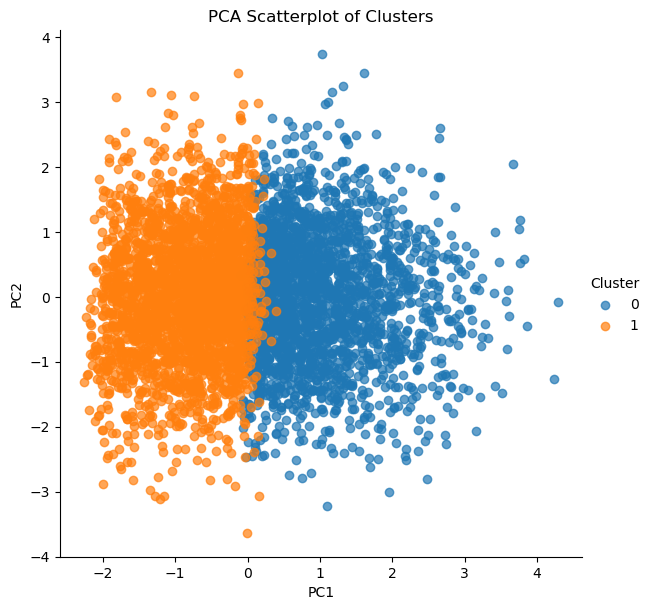

In [32]:
# Create new DataFrame:
df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_pca['Cluster'] = pred

# Plot scatterplot using seaborn.FacetGrid:
g = sns.FacetGrid(df_pca, hue='Cluster', height=6)
g.map(plt.scatter, 'PC1', 'PC2', alpha=0.7)
g.add_legend()
plt.title('PCA Scatterplot of Clusters')
plt.show()